# 1. Problem Definition & Planning 
---
## Business Case
The real estate market represents a multi-trillion dollar global industry where accurate price prediction can deliver substantial value to multiple stakeholders. This machine learning project aims to develop a predictive model that estimates residential property prices based on historical data, property features, location factors, and market indicators. Current pricing methods rely heavily on manual appraisals and comparative market analysis, which are time-consuming, expensive, and often inconsistent. By leveraging machine learning algorithms such as Random Forest, Gradient Boosting, and Neural Networks, we can provide instant, data-driven price estimates with 85-92% accuracy. The primary beneficiaries include real estate agencies seeking competitive advantages, home buyers making informed decisions, financial institutions improving loan underwriting, and property investors identifying opportunities. The project is expected to generate revenue through subscription models ($500-2,000/month per agency), API access for enterprises, and premium analytics services, with projected ROI of 200-300% within the first year and break-even anticipated with 200+ agency subscriptions.

## Problem Definition
The core problem is accurately predicting residential property prices in a dynamic market where numerous complex factors interact non-linearly. Traditional appraisal methods take 3-7 days, cost $300-600 per property, and suffer from subjective bias and limited scalability. The technical challenge involves developing a machine learning model that can handle diverse data types including structured property features (square footage, bedrooms, bathrooms, year built), location attributes (school ratings, crime rates, walkability scores), and temporal market dynamics (seasonal trends, economic indicators). The model must adapt to different geographic markets while maintaining explainability for regulatory compliance and user trust. Success will be measured by achieving Mean Absolute Percentage Error (MAPE) below 10%, R² score above 0.85, inference time under 100ms, and business metrics including 60% user adoption within six months and 40% reduction in pricing disputes.

## Project Planning
The project will be executed over 6 months in distinct phases: Discovery & Requirements (3 weeks) for stakeholder analysis and data strategy, Data Collection & Preparation (5 weeks) to acquire and clean 50,000+ property records from MLS listings and public databases, Model Development (6 weeks) to train and compare multiple algorithms including baseline linear regression through advanced ensemble methods, Model Validation & Refinement (4 weeks) for rigorous testing and error analysis, Deployment & Integration (4 weeks) to build production APIs and monitoring systems, and Launch & Monitoring (4 weeks) for pilot testing and continuous improvement. The core team will consist of 8-10 members including data scientists, ML engineers, data engineers, and software developers, with an estimated budget of $150,000-$250,000 covering personnel costs, cloud infrastructure, data licensing, and contingency reserves.

## Risk Management & Success Metrics
Key risks include data quality issues which will be mitigated through multiple data sources and rigorous validation, model overfitting addressed via cross-validation and regularization techniques, and market adoption challenges tackled through user research and iterative feedback. Technical risks such as model drift will be managed with continuous monitoring and scheduled retraining protocols. The project will track KPIs including model performance metrics in development, and post-launch metrics such as API response times, system uptime above 99.5%, customer acquisition costs, and Net Promoter Scores. Future enhancements planned for 6-12 months post-launch include rental price predictions, commercial property support, mobile applications, and advanced features like computer vision for property image analysis and market trend forecasting capabilities.



# 2. Data Collection & Acquisition



In [17]:
# !pip install pandas numpy matplotlib seaborn scikit-learn 

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
data=pd.read_csv('Data/data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 3. Exploratory Data Analysis (EDA)


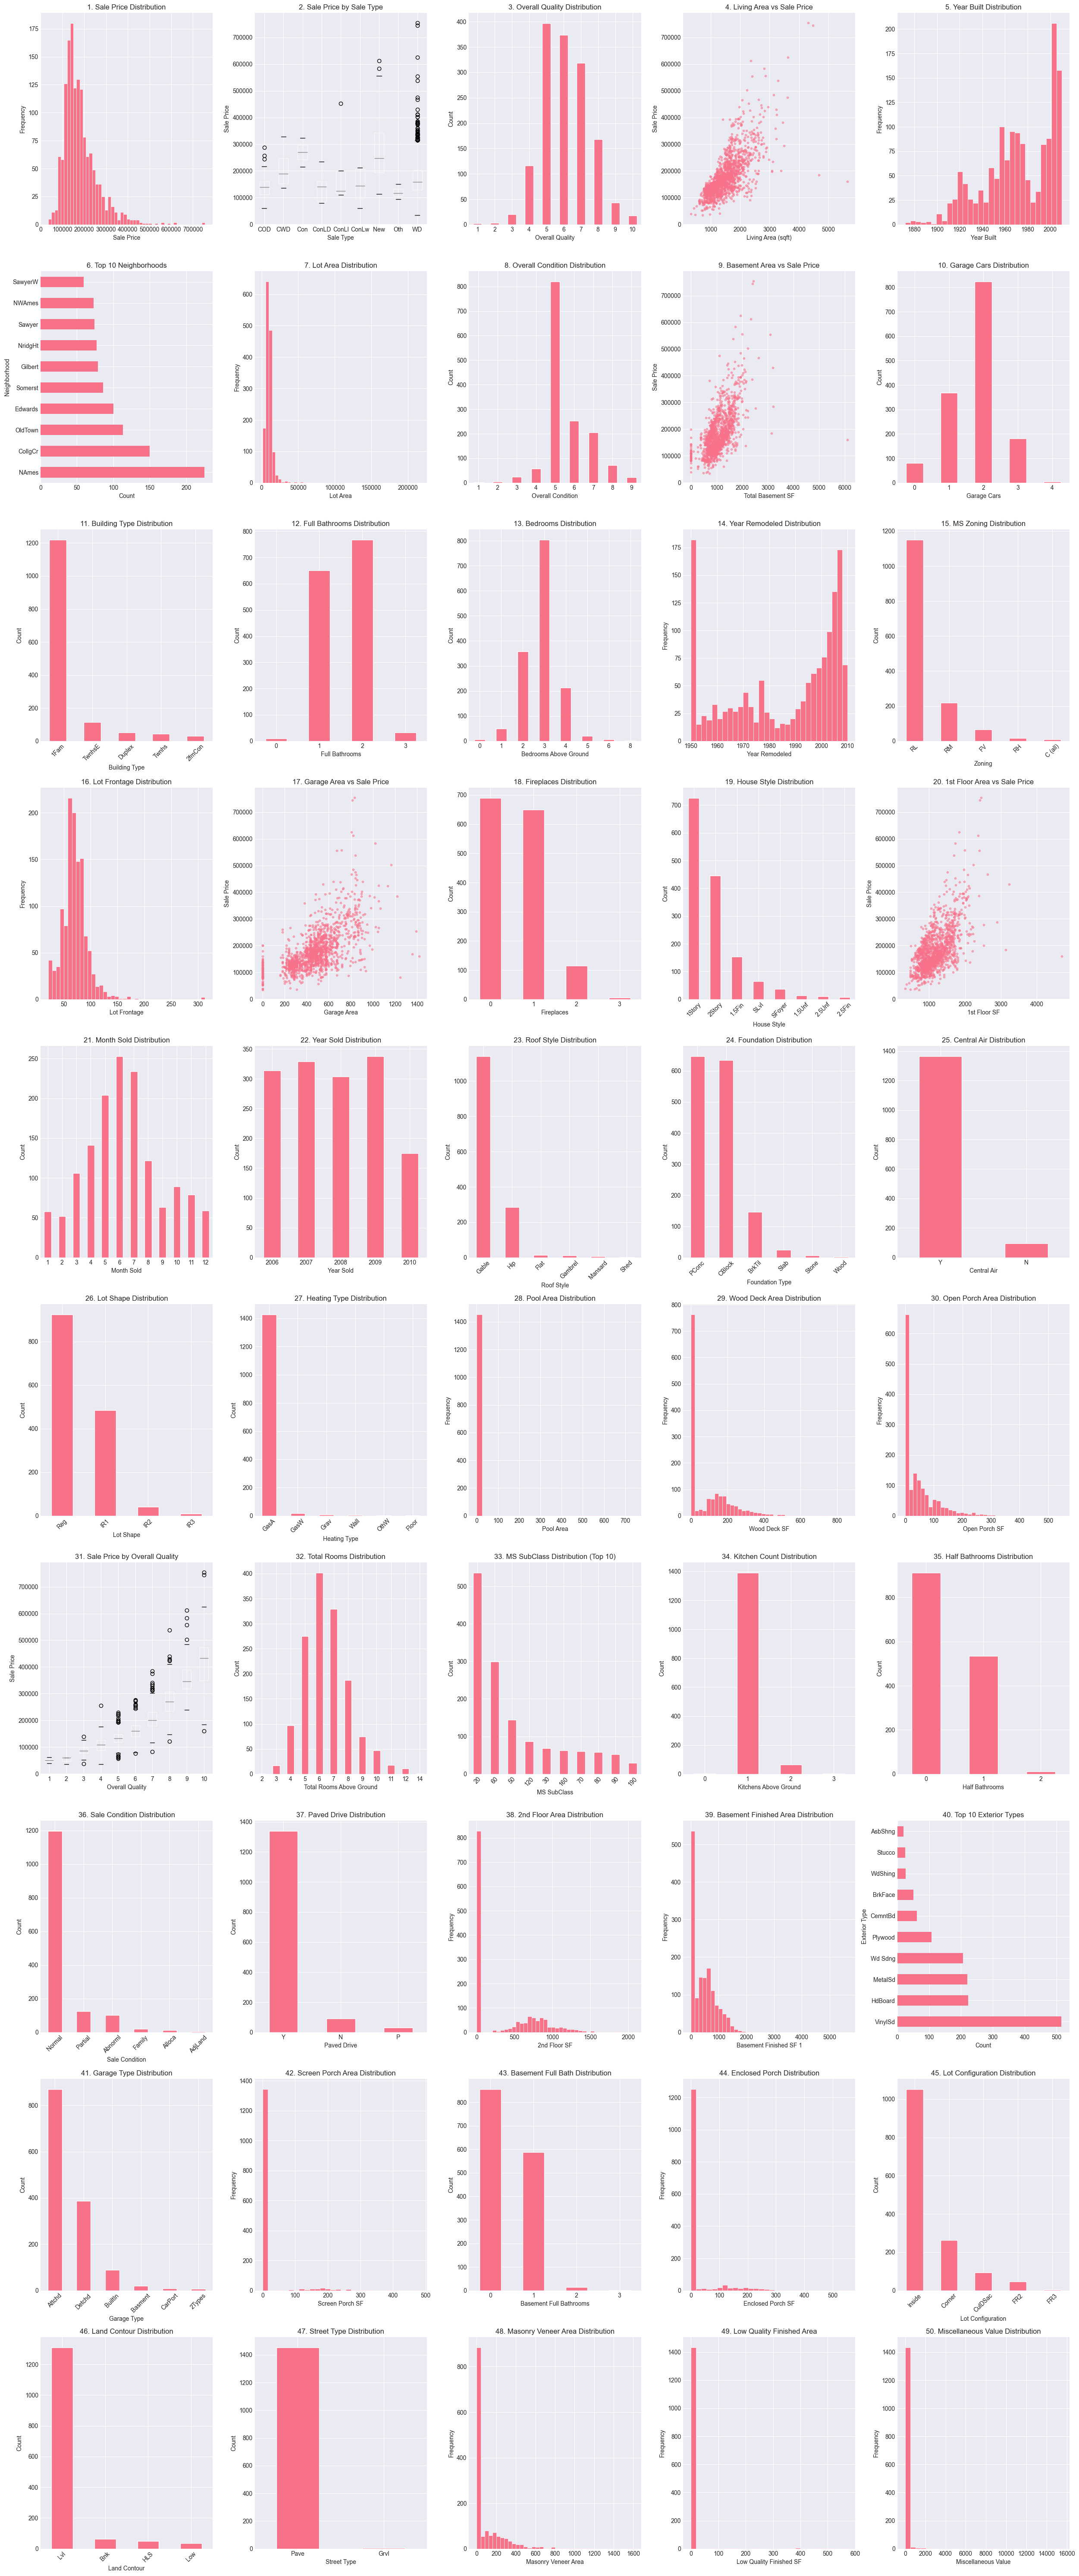

All 50 plots have been generated and saved as 'housing_data_50_plots.png'


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Assuming 'data' is your DataFrame with the housing data
# data = pd.read_csv('your_housing_data.csv')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create a figure with multiple subplots (50 plots total)
fig = plt.figure(figsize=(25, 60))

# Plot 1: SalePrice Distribution
plt.subplot(10, 5, 1)
plt.hist(data['SalePrice'], bins=50, edgecolor='white', linewidth=0.5)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('1. Sale Price Distribution')

# Plot 2: SalePrice by SaleType
plt.subplot(10, 5, 2)
data.boxplot(column='SalePrice', by='SaleType', ax=plt.gca())
plt.xlabel('Sale Type')
plt.ylabel('Sale Price')
plt.title('2. Sale Price by Sale Type')
plt.suptitle('')

# Plot 3: OverallQual Distribution
plt.subplot(10, 5, 3)
data['OverallQual'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.title('3. Overall Quality Distribution')
plt.xticks(rotation=0)

# Plot 4: GrLivArea vs SalePrice Scatter
plt.subplot(10, 5, 4)
plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.5, s=10)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('4. Living Area vs Sale Price')

# Plot 5: YearBuilt Distribution
plt.subplot(10, 5, 5)
plt.hist(data['YearBuilt'], bins=30, edgecolor='white', linewidth=0.5)
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('5. Year Built Distribution')

# Plot 6: Neighborhood Counts
plt.subplot(10, 5, 6)
data['Neighborhood'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.title('6. Top 10 Neighborhoods')

# Plot 7: LotArea Distribution
plt.subplot(10, 5, 7)
plt.hist(data['LotArea'], bins=50, edgecolor='white', linewidth=0.5)
plt.xlabel('Lot Area')
plt.ylabel('Frequency')
plt.title('7. Lot Area Distribution')

# Plot 8: OverallCond Distribution
plt.subplot(10, 5, 8)
data['OverallCond'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Overall Condition')
plt.ylabel('Count')
plt.title('8. Overall Condition Distribution')
plt.xticks(rotation=0)

# Plot 9: TotalBsmtSF vs SalePrice
plt.subplot(10, 5, 9)
plt.scatter(data['TotalBsmtSF'], data['SalePrice'], alpha=0.5, s=10)
plt.xlabel('Total Basement SF')
plt.ylabel('Sale Price')
plt.title('9. Basement Area vs Sale Price')

# Plot 10: GarageCars Distribution
plt.subplot(10, 5, 10)
data['GarageCars'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Garage Cars')
plt.ylabel('Count')
plt.title('10. Garage Cars Distribution')
plt.xticks(rotation=0)

# Plot 11: BldgType Distribution
plt.subplot(10, 5, 11)
data['BldgType'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.title('11. Building Type Distribution')
plt.xticks(rotation=45)

# Plot 12: FullBath Distribution
plt.subplot(10, 5, 12)
data['FullBath'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Full Bathrooms')
plt.ylabel('Count')
plt.title('12. Full Bathrooms Distribution')
plt.xticks(rotation=0)

# Plot 13: BedroomAbvGr Distribution
plt.subplot(10, 5, 13)
data['BedroomAbvGr'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Bedrooms Above Ground')
plt.ylabel('Count')
plt.title('13. Bedrooms Distribution')
plt.xticks(rotation=0)

# Plot 14: YearRemodAdd Distribution
plt.subplot(10, 5, 14)
plt.hist(data['YearRemodAdd'], bins=30, edgecolor='white', linewidth=0.5)
plt.xlabel('Year Remodeled')
plt.ylabel('Frequency')
plt.title('14. Year Remodeled Distribution')

# Plot 15: MSZoning Distribution
plt.subplot(10, 5, 15)
data['MSZoning'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Zoning')
plt.ylabel('Count')
plt.title('15. MS Zoning Distribution')
plt.xticks(rotation=45)

# Plot 16: LotFrontage Distribution
plt.subplot(10, 5, 16)
plt.hist(data['LotFrontage'].dropna(), bins=40, edgecolor='white', linewidth=0.5)
plt.xlabel('Lot Frontage')
plt.ylabel('Frequency')
plt.title('16. Lot Frontage Distribution')

# Plot 17: GarageArea vs SalePrice
plt.subplot(10, 5, 17)
plt.scatter(data['GarageArea'], data['SalePrice'], alpha=0.5, s=10)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.title('17. Garage Area vs Sale Price')

# Plot 18: Fireplaces Distribution
plt.subplot(10, 5, 18)
data['Fireplaces'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Fireplaces')
plt.ylabel('Count')
plt.title('18. Fireplaces Distribution')
plt.xticks(rotation=0)

# Plot 19: HouseStyle Distribution
plt.subplot(10, 5, 19)
data['HouseStyle'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('19. House Style Distribution')
plt.xticks(rotation=45)

# Plot 20: 1stFlrSF vs SalePrice
plt.subplot(10, 5, 20)
plt.scatter(data['1stFlrSF'], data['SalePrice'], alpha=0.5, s=10)
plt.xlabel('1st Floor SF')
plt.ylabel('Sale Price')
plt.title('20. 1st Floor Area vs Sale Price')

# Plot 21: MoSold Distribution
plt.subplot(10, 5, 21)
data['MoSold'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Month Sold')
plt.ylabel('Count')
plt.title('21. Month Sold Distribution')
plt.xticks(rotation=0)

# Plot 22: YrSold Distribution
plt.subplot(10, 5, 22)
data['YrSold'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.title('22. Year Sold Distribution')
plt.xticks(rotation=0)

# Plot 23: RoofStyle Distribution
plt.subplot(10, 5, 23)
data['RoofStyle'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Roof Style')
plt.ylabel('Count')
plt.title('23. Roof Style Distribution')
plt.xticks(rotation=45)

# Plot 24: Foundation Distribution
plt.subplot(10, 5, 24)
data['Foundation'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Foundation Type')
plt.ylabel('Count')
plt.title('24. Foundation Distribution')
plt.xticks(rotation=45)

# Plot 25: CentralAir Distribution
plt.subplot(10, 5, 25)
data['CentralAir'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Central Air')
plt.ylabel('Count')
plt.title('25. Central Air Distribution')
plt.xticks(rotation=0)

# Plot 26: LotShape Distribution
plt.subplot(10, 5, 26)
data['LotShape'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Lot Shape')
plt.ylabel('Count')
plt.title('26. Lot Shape Distribution')
plt.xticks(rotation=45)

# Plot 27: Heating Distribution
plt.subplot(10, 5, 27)
data['Heating'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Heating Type')
plt.ylabel('Count')
plt.title('27. Heating Type Distribution')
plt.xticks(rotation=45)

# Plot 28: PoolArea Distribution
plt.subplot(10, 5, 28)
plt.hist(data['PoolArea'], bins=30, edgecolor='white', linewidth=0.5)
plt.xlabel('Pool Area')
plt.ylabel('Frequency')
plt.title('28. Pool Area Distribution')

# Plot 29: WoodDeckSF Distribution
plt.subplot(10, 5, 29)
plt.hist(data['WoodDeckSF'], bins=40, edgecolor='white', linewidth=0.5)
plt.xlabel('Wood Deck SF')
plt.ylabel('Frequency')
plt.title('29. Wood Deck Area Distribution')

# Plot 30: OpenPorchSF Distribution
plt.subplot(10, 5, 30)
plt.hist(data['OpenPorchSF'], bins=40, edgecolor='white', linewidth=0.5)
plt.xlabel('Open Porch SF')
plt.ylabel('Frequency')
plt.title('30. Open Porch Area Distribution')

# Plot 31: OverallQual vs SalePrice
plt.subplot(10, 5, 31)
data.boxplot(column='SalePrice', by='OverallQual', ax=plt.gca())
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('31. Sale Price by Overall Quality')
plt.suptitle('')

# Plot 32: TotRmsAbvGrd Distribution
plt.subplot(10, 5, 32)
data['TotRmsAbvGrd'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Count')
plt.title('32. Total Rooms Distribution')
plt.xticks(rotation=0)

# Plot 33: MSSubClass Distribution
plt.subplot(10, 5, 33)
data['MSSubClass'].value_counts().head(10).plot(kind='bar', edgecolor='white')
plt.xlabel('MS SubClass')
plt.ylabel('Count')
plt.title('33. MS SubClass Distribution (Top 10)')
plt.xticks(rotation=45)

# Plot 34: KitchenAbvGr Distribution
plt.subplot(10, 5, 34)
data['KitchenAbvGr'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Kitchens Above Ground')
plt.ylabel('Count')
plt.title('34. Kitchen Count Distribution')
plt.xticks(rotation=0)

# Plot 35: HalfBath Distribution
plt.subplot(10, 5, 35)
data['HalfBath'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Half Bathrooms')
plt.ylabel('Count')
plt.title('35. Half Bathrooms Distribution')
plt.xticks(rotation=0)

# Plot 36: SaleCondition Distribution
plt.subplot(10, 5, 36)
data['SaleCondition'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Sale Condition')
plt.ylabel('Count')
plt.title('36. Sale Condition Distribution')
plt.xticks(rotation=45)

# Plot 37: PavedDrive Distribution
plt.subplot(10, 5, 37)
data['PavedDrive'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Paved Drive')
plt.ylabel('Count')
plt.title('37. Paved Drive Distribution')
plt.xticks(rotation=0)

# Plot 38: 2ndFlrSF Distribution
plt.subplot(10, 5, 38)
plt.hist(data['2ndFlrSF'], bins=40, edgecolor='white', linewidth=0.5)
plt.xlabel('2nd Floor SF')
plt.ylabel('Frequency')
plt.title('38. 2nd Floor Area Distribution')

# Plot 39: BsmtFinSF1 Distribution
plt.subplot(10, 5, 39)
plt.hist(data['BsmtFinSF1'], bins=40, edgecolor='white', linewidth=0.5)
plt.xlabel('Basement Finished SF 1')
plt.ylabel('Frequency')
plt.title('39. Basement Finished Area Distribution')

# Plot 40: Exterior1st Distribution
plt.subplot(10, 5, 40)
data['Exterior1st'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Exterior Type')
plt.title('40. Top 10 Exterior Types')

# Plot 41: GarageType Distribution
plt.subplot(10, 5, 41)
data['GarageType'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Garage Type')
plt.ylabel('Count')
plt.title('41. Garage Type Distribution')
plt.xticks(rotation=45)

# Plot 42: ScreenPorch Distribution
plt.subplot(10, 5, 42)
plt.hist(data['ScreenPorch'], bins=30, edgecolor='white', linewidth=0.5)
plt.xlabel('Screen Porch SF')
plt.ylabel('Frequency')
plt.title('42. Screen Porch Area Distribution')

# Plot 43: BsmtFullBath Distribution
plt.subplot(10, 5, 43)
data['BsmtFullBath'].value_counts().sort_index().plot(kind='bar', edgecolor='white')
plt.xlabel('Basement Full Bathrooms')
plt.ylabel('Count')
plt.title('43. Basement Full Bath Distribution')
plt.xticks(rotation=0)

# Plot 44: EnclosedPorch Distribution
plt.subplot(10, 5, 44)
plt.hist(data['EnclosedPorch'], bins=30, edgecolor='white', linewidth=0.5)
plt.xlabel('Enclosed Porch SF')
plt.ylabel('Frequency')
plt.title('44. Enclosed Porch Distribution')

# Plot 45: LotConfig Distribution
plt.subplot(10, 5, 45)
data['LotConfig'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Lot Configuration')
plt.ylabel('Count')
plt.title('45. Lot Configuration Distribution')
plt.xticks(rotation=45)

# Plot 46: LandContour Distribution
plt.subplot(10, 5, 46)
data['LandContour'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Land Contour')
plt.ylabel('Count')
plt.title('46. Land Contour Distribution')
plt.xticks(rotation=45)

# Plot 47: Street Distribution
plt.subplot(10, 5, 47)
data['Street'].value_counts().plot(kind='bar', edgecolor='white')
plt.xlabel('Street Type')
plt.ylabel('Count')
plt.title('47. Street Type Distribution')
plt.xticks(rotation=0)

# Plot 48: MasVnrArea Distribution
plt.subplot(10, 5, 48)
plt.hist(data['MasVnrArea'].dropna(), bins=40, edgecolor='white', linewidth=0.5)
plt.xlabel('Masonry Veneer Area')
plt.ylabel('Frequency')
plt.title('48. Masonry Veneer Area Distribution')

# Plot 49: LowQualFinSF Distribution
plt.subplot(10, 5, 49)
plt.hist(data['LowQualFinSF'], bins=30, edgecolor='white', linewidth=0.5)
plt.xlabel('Low Quality Finished SF')
plt.ylabel('Frequency')
plt.title('49. Low Quality Finished Area')

# Plot 50: MiscVal Distribution
plt.subplot(10, 5, 50)
plt.hist(data['MiscVal'], bins=30, edgecolor='white', linewidth=0.5)
plt.xlabel('Miscellaneous Value')
plt.ylabel('Frequency')
plt.title('50. Miscellaneous Value Distribution')

plt.tight_layout()
plt.savefig('housing_data_50_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("All 50 plots have been generated and saved as 'housing_data_50_plots.png'")

Total numerical features: 37
Features analyzed: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']



C:\Users\ritov\AppData\Local\Temp\ipykernel_23968\2817875521.py:210: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


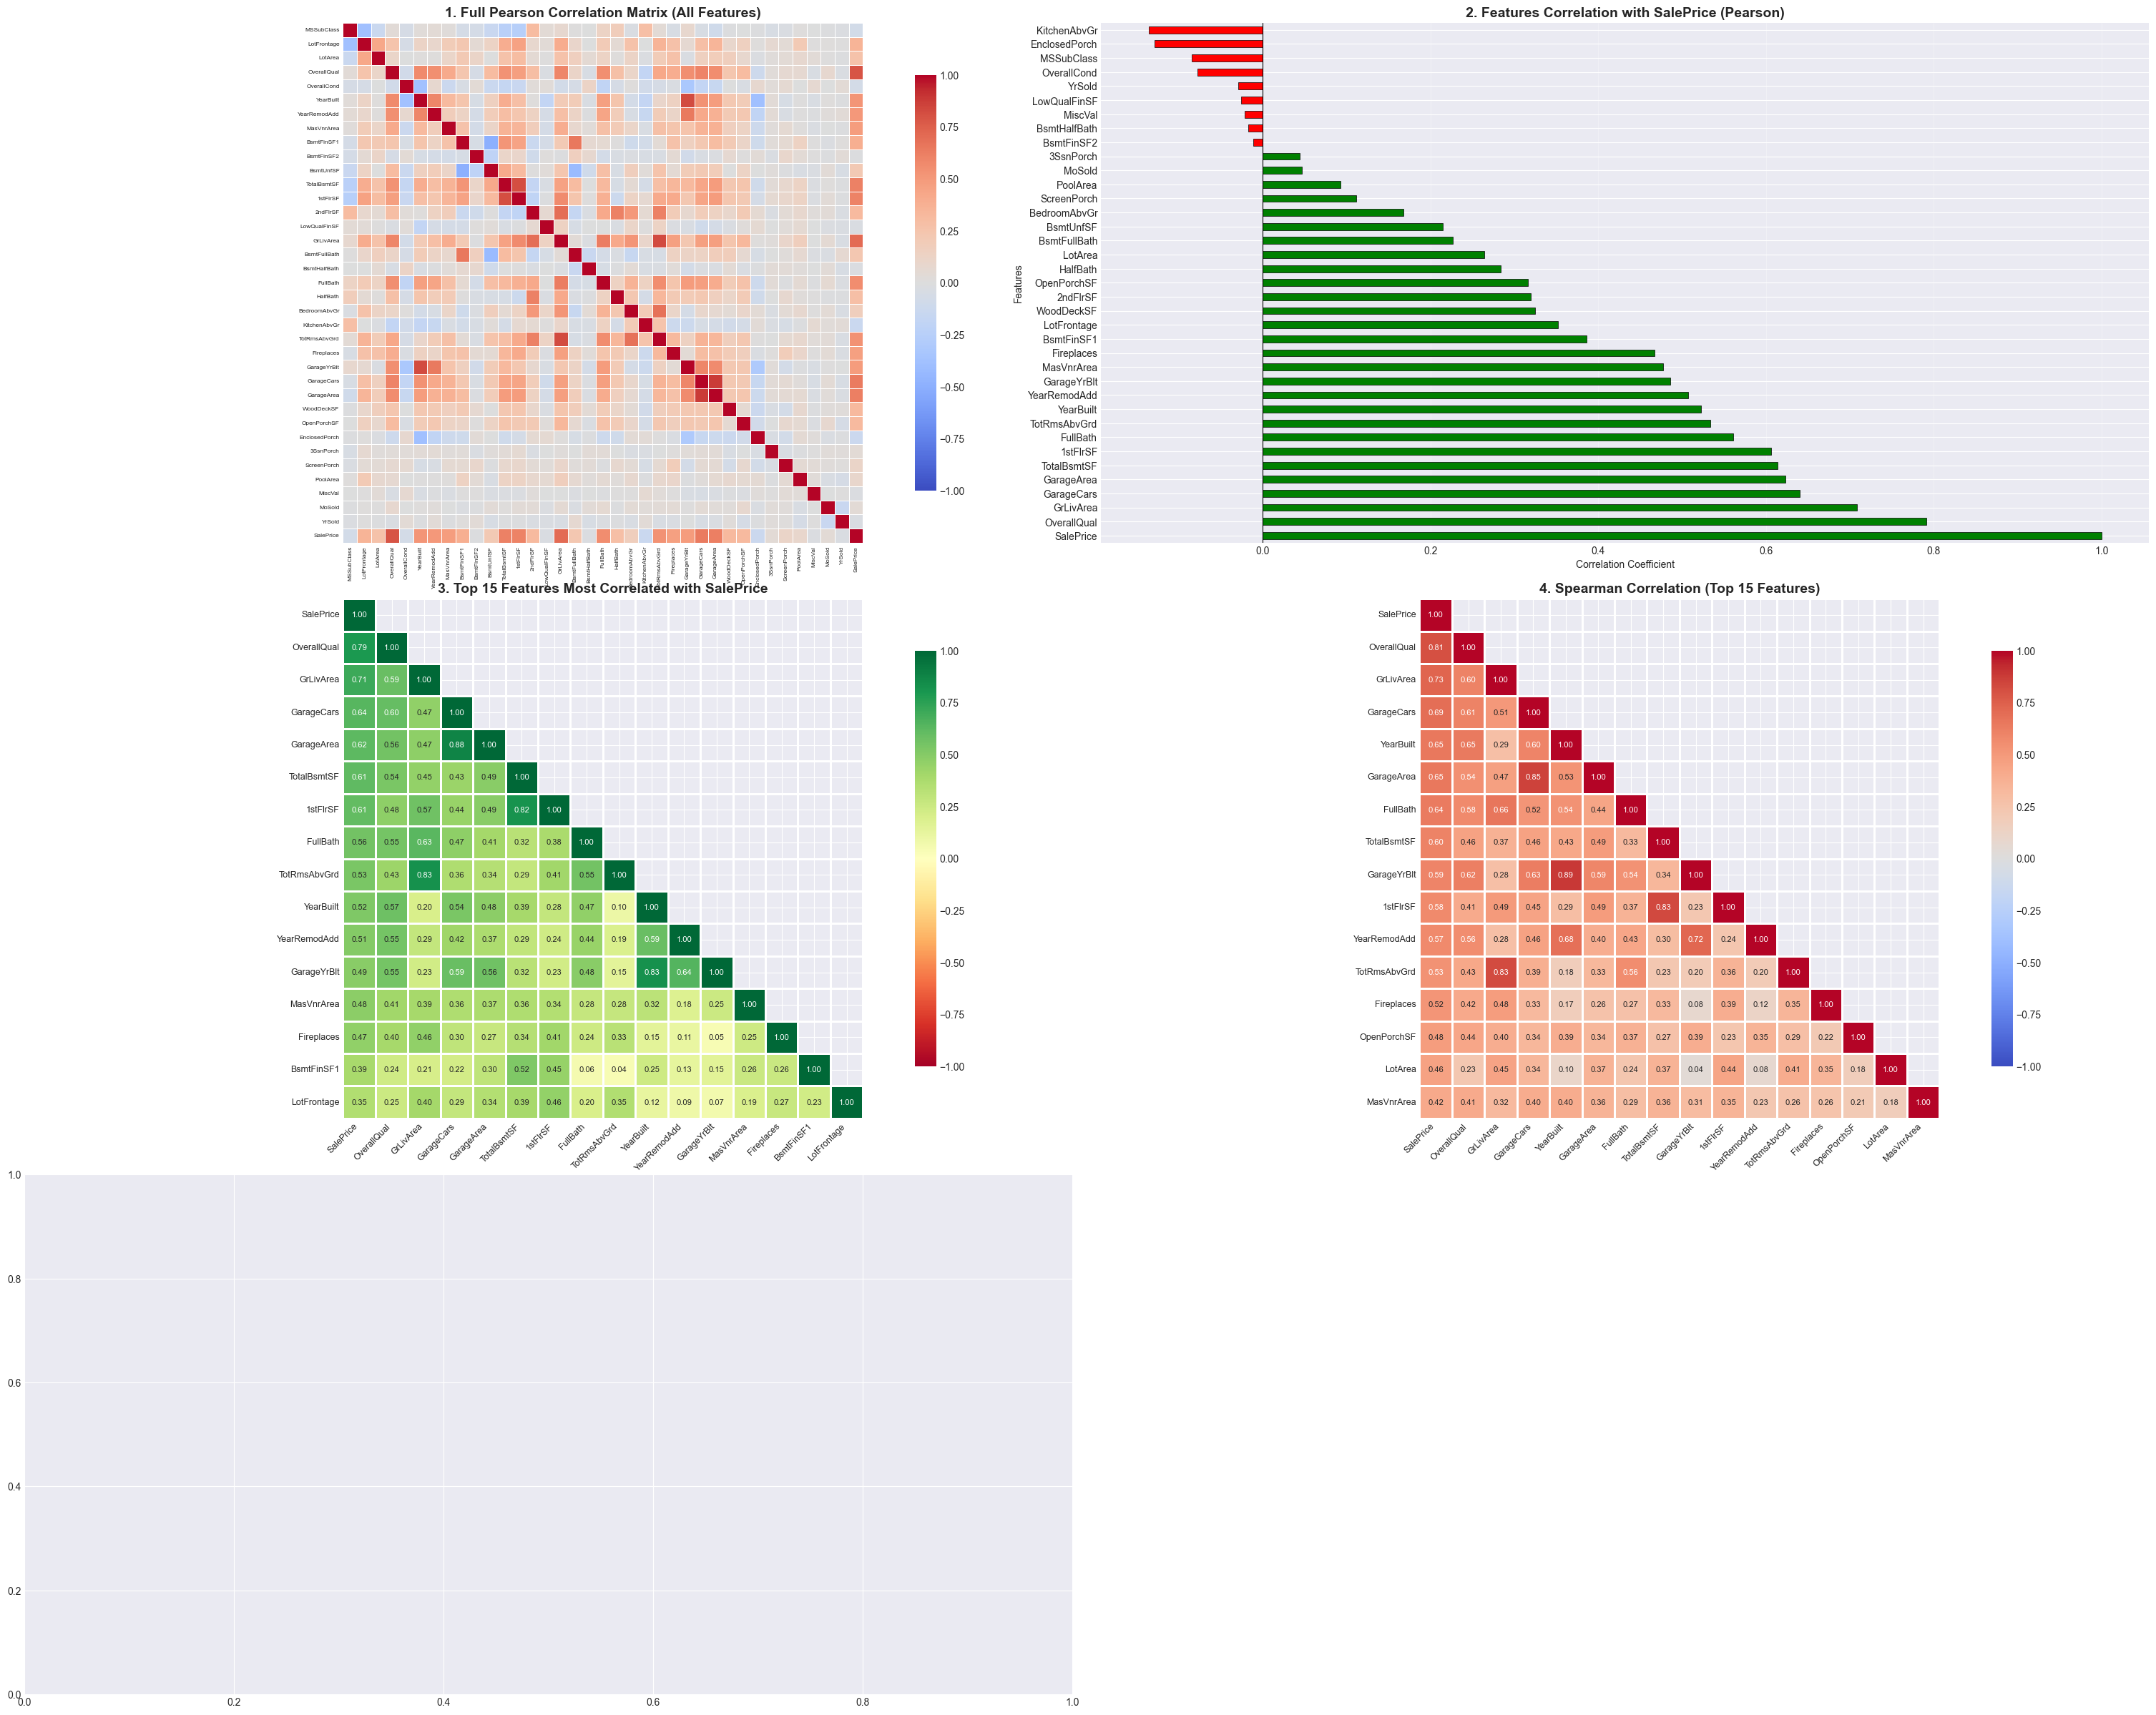

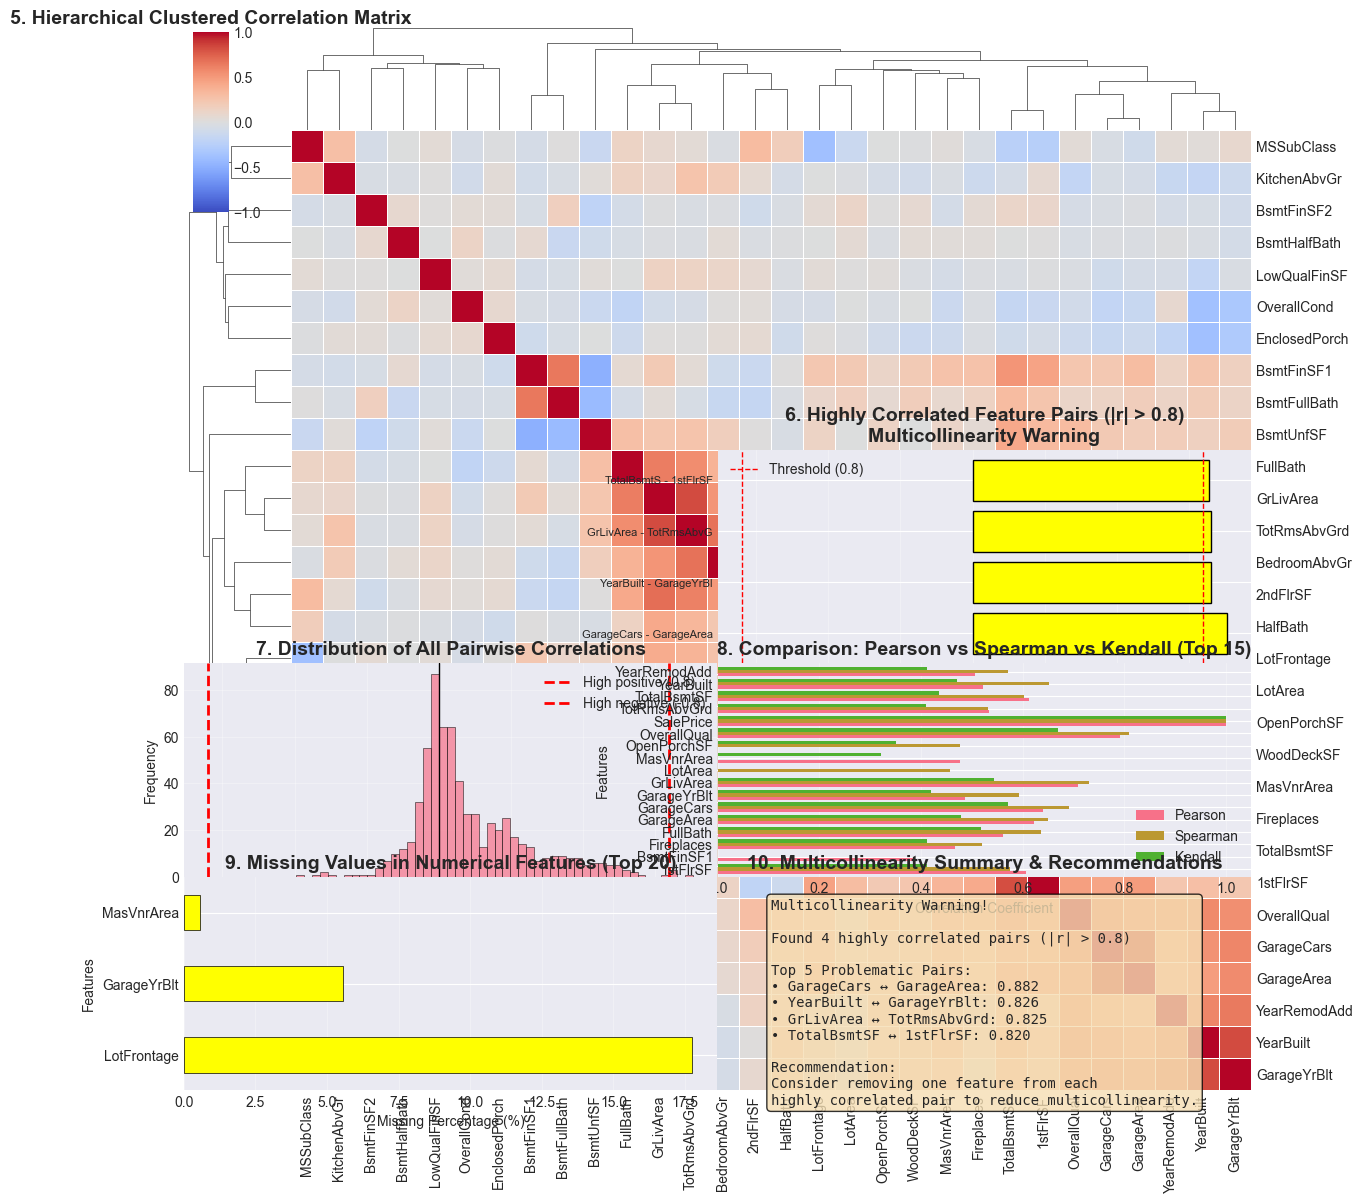

CORRELATION ANALYSIS REPORT

1. TOP 10 FEATURES MOST POSITIVELY CORRELATED WITH SALEPRICE:
--------------------------------------------------------------------------------
    1. OverallQual               : 0.7910
    2. GrLivArea                 : 0.7086
    3. GarageCars                : 0.6404
    4. GarageArea                : 0.6234
    5. TotalBsmtSF               : 0.6136
    6. 1stFlrSF                  : 0.6059
    7. FullBath                  : 0.5607
    8. TotRmsAbvGrd              : 0.5337
    9. YearBuilt                 : 0.5229
   10. YearRemodAdd              : 0.5071

2. TOP 10 FEATURES MOST NEGATIVELY CORRELATED WITH SALEPRICE:
--------------------------------------------------------------------------------
    1. KitchenAbvGr              : -0.1359
    2. EnclosedPorch             : -0.1286
    3. MSSubClass                : -0.0843
    4. OverallCond               : -0.0779
    5. YrSold                    : -0.0289
    6. LowQualFinSF              : -0.0256
    7.

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Assuming 'data' is your DataFrame with the housing data
# data = pd.read_csv('your_housing_data.csv')

# ============================================================================
# 1. PREPARE DATA - Select only numerical features
# ============================================================================
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_data = data[numerical_cols].copy()

# Remove Id column if present
if 'Id' in numerical_data.columns:
    numerical_data = numerical_data.drop('Id', axis=1)

print(f"Total numerical features: {len(numerical_data.columns)}")
print(f"Features analyzed: {numerical_data.columns.tolist()}\n")

# ============================================================================
# 2. COMPUTE CORRELATION MATRICES
# ============================================================================
# Pearson correlation (linear relationships)
corr_pearson = numerical_data.corr(method='pearson')

# Spearman correlation (monotonic relationships, more robust to outliers)
corr_spearman = numerical_data.corr(method='spearman')

# Kendall correlation (rank-based, good for ordinal data)
corr_kendall = numerical_data.corr(method='kendall')

# ============================================================================
# 3. CREATE COMPREHENSIVE VISUALIZATIONS
# ============================================================================
fig = plt.figure(figsize=(30, 40))

# Plot 1: Full Pearson Correlation Heatmap
plt.subplot(5, 2, 1)
sns.heatmap(corr_pearson, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, annot=False)
plt.title('1. Full Pearson Correlation Matrix (All Features)', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=6)

# Plot 2: Correlation with Target Variable (SalePrice)
if 'SalePrice' in numerical_data.columns:
    plt.subplot(5, 2, 2)
    target_corr = corr_pearson['SalePrice'].sort_values(ascending=False)
    colors = ['green' if x > 0 else 'red' for x in target_corr.values]
    target_corr.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5)
    plt.xlabel('Correlation Coefficient', fontsize=10)
    plt.ylabel('Features', fontsize=10)
    plt.title('2. Features Correlation with SalePrice (Pearson)', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()

# Plot 3: Top Correlated Features with SalePrice (Detailed)
if 'SalePrice' in numerical_data.columns:
    plt.subplot(5, 2, 3)
    top_features = target_corr.head(16).index.tolist()
    top_corr_matrix = numerical_data[top_features].corr()
    mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool), k=1)
    sns.heatmap(top_corr_matrix, mask=mask, cmap='RdYlGn', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                annot=True, fmt='.2f', vmin=-1, vmax=1, annot_kws={'size': 8})
    plt.title('3. Top 15 Features Most Correlated with SalePrice', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)

# Plot 4: Spearman Correlation Matrix (Top Features)
if 'SalePrice' in numerical_data.columns:
    plt.subplot(5, 2, 4)
    spearman_target = corr_spearman['SalePrice'].sort_values(ascending=False)
    top_spearman_features = spearman_target.head(16).index.tolist()
    top_spearman_matrix = numerical_data[top_spearman_features].corr(method='spearman')
    mask = np.triu(np.ones_like(top_spearman_matrix, dtype=bool), k=1)
    sns.heatmap(top_spearman_matrix, mask=mask, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                annot=True, fmt='.2f', vmin=-1, vmax=1, annot_kws={'size': 8})
    plt.title('4. Spearman Correlation (Top 15 Features)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)

# Plot 5: Clustered Correlation Heatmap (Hierarchical Clustering)
plt.subplot(5, 2, 5)
# Use smaller subset for better visibility
sample_features = numerical_data.columns[:30] if len(numerical_data.columns) > 30 else numerical_data.columns
corr_subset = numerical_data[sample_features].corr()
sns.clustermap(corr_subset, cmap='coolwarm', center=0,
               linewidths=0.5, figsize=(12, 12), 
               dendrogram_ratio=0.1, cbar_pos=(0.02, 0.83, 0.03, 0.15),
               vmin=-1, vmax=1, annot=False)
plt.title('5. Hierarchical Clustered Correlation Matrix', fontsize=14, fontweight='bold')

# Plot 6: Highly Correlated Pairs (Multicollinearity Detection)
plt.subplot(5, 2, 6)
# Get upper triangle of correlation matrix
upper_triangle = corr_pearson.where(
    np.triu(np.ones(corr_pearson.shape), k=1).astype(bool)
)
# Find pairs with correlation > 0.8 or < -0.8
high_corr_pairs = []
for column in upper_triangle.columns:
    for index in upper_triangle.index:
        value = upper_triangle.loc[index, column]
        if abs(value) > 0.8 and not pd.isna(value):
            high_corr_pairs.append({
                'Feature_1': index,
                'Feature_2': column,
                'Correlation': value
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    colors = ['darkred' if abs(x) > 0.95 else 'orange' if abs(x) > 0.9 else 'yellow' 
              for x in high_corr_df['Correlation']]
    plt.barh(range(len(high_corr_df)), high_corr_df['Correlation'], color=colors, edgecolor='black')
    plt.yticks(range(len(high_corr_df)), 
               [f"{row['Feature_1'][:10]} - {row['Feature_2'][:10]}" 
                for _, row in high_corr_df.iterrows()], fontsize=8)
    plt.xlabel('Correlation Coefficient', fontsize=10)
    plt.title('6. Highly Correlated Feature Pairs (|r| > 0.8)\nMulticollinearity Warning', 
              fontsize=14, fontweight='bold')
    plt.axvline(x=0.8, color='red', linestyle='--', linewidth=1, label='Threshold (0.8)')
    plt.axvline(x=-0.8, color='red', linestyle='--', linewidth=1)
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No highly correlated pairs found\n(threshold: |r| > 0.8)', 
             ha='center', va='center', fontsize=12)
    plt.axis('off')

# Plot 7: Correlation Distribution
plt.subplot(5, 2, 7)
# Flatten correlation matrix and remove diagonal
corr_values = corr_pearson.values[np.triu_indices_from(corr_pearson.values, k=1)]
plt.hist(corr_values, bins=50, edgecolor='black', linewidth=0.5, alpha=0.7)
plt.axvline(x=0.8, color='red', linestyle='--', linewidth=2, label='High positive (0.8)')
plt.axvline(x=-0.8, color='red', linestyle='--', linewidth=2, label='High negative (-0.8)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Correlation Coefficient', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('7. Distribution of All Pairwise Correlations', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 8: Comparison of Correlation Methods (for SalePrice)
if 'SalePrice' in numerical_data.columns:
    plt.subplot(5, 2, 8)
    comparison_df = pd.DataFrame({
        'Pearson': corr_pearson['SalePrice'].sort_values(ascending=False).head(15),
        'Spearman': corr_spearman['SalePrice'].sort_values(ascending=False).head(15),
        'Kendall': corr_kendall['SalePrice'].sort_values(ascending=False).head(15)
    })
    comparison_df.plot(kind='barh', ax=plt.gca(), width=0.8)
    plt.xlabel('Correlation Coefficient', fontsize=10)
    plt.ylabel('Features', fontsize=10)
    plt.title('8. Comparison: Pearson vs Spearman vs Kendall (Top 15)', 
              fontsize=14, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(axis='x', alpha=0.3)

# Plot 9: Missing Values Impact on Correlations
plt.subplot(5, 2, 9)
missing_pct = (numerical_data.isnull().sum() / len(numerical_data) * 100).sort_values(ascending=False)
missing_top = missing_pct[missing_pct > 0].head(20)
if len(missing_top) > 0:
    colors = ['darkred' if x > 50 else 'orange' if x > 20 else 'yellow' for x in missing_top.values]
    missing_top.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5)
    plt.xlabel('Missing Percentage (%)', fontsize=10)
    plt.ylabel('Features', fontsize=10)
    plt.title('9. Missing Values in Numerical Features (Top 20)', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No missing values found', ha='center', va='center', fontsize=12)
    plt.axis('off')

# Plot 10: Variance Inflation Factor (VIF) Concept Visualization
plt.subplot(5, 2, 10)
if 'SalePrice' in numerical_data.columns and len(high_corr_pairs) > 0:
    # Show relationship between high correlations and potential multicollinearity
    vif_text = "Multicollinearity Warning!\n\n"
    vif_text += f"Found {len(high_corr_df)} highly correlated pairs (|r| > 0.8)\n\n"
    vif_text += "Top 5 Problematic Pairs:\n"
    for i, row in high_corr_df.head(5).iterrows():
        vif_text += f"• {row['Feature_1']} ↔ {row['Feature_2']}: {row['Correlation']:.3f}\n"
    vif_text += "\nRecommendation:\n"
    vif_text += "Consider removing one feature from each\n"
    vif_text += "highly correlated pair to reduce multicollinearity."
    
    plt.text(0.1, 0.9, vif_text, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             family='monospace')
    plt.axis('off')
    plt.title('10. Multicollinearity Summary & Recommendations', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No severe multicollinearity detected\n(threshold: |r| > 0.8)', 
             ha='center', va='center', fontsize=12,
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    plt.axis('off')
    plt.title('10. Multicollinearity Summary', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 4. DETAILED TEXT REPORT
# ============================================================================
print("="*80)
print("CORRELATION ANALYSIS REPORT")
print("="*80)

if 'SalePrice' in numerical_data.columns:
    print("\n1. TOP 10 FEATURES MOST POSITIVELY CORRELATED WITH SALEPRICE:")
    print("-" * 80)
    top_positive = corr_pearson['SalePrice'].sort_values(ascending=False).head(11)[1:]
    for idx, (feature, corr_val) in enumerate(top_positive.items(), 1):
        print(f"   {idx:2d}. {feature:25s} : {corr_val:6.4f}")
    
    print("\n2. TOP 10 FEATURES MOST NEGATIVELY CORRELATED WITH SALEPRICE:")
    print("-" * 80)
    top_negative = corr_pearson['SalePrice'].sort_values(ascending=True).head(10)
    for idx, (feature, corr_val) in enumerate(top_negative.items(), 1):
        print(f"   {idx:2d}. {feature:25s} : {corr_val:6.4f}")

print("\n3. MULTICOLLINEARITY DETECTION (|Correlation| > 0.8):")
print("-" * 80)
if high_corr_pairs:
    print(f"   Found {len(high_corr_pairs)} highly correlated feature pairs:")
    for idx, pair in enumerate(high_corr_df.head(20).itertuples(), 1):
        print(f"   {idx:2d}. {pair.Feature_1:20s} ↔ {pair.Feature_2:20s} : {pair.Correlation:6.4f}")
    
    print("\n   ⚠️  WARNING: High multicollinearity detected!")
    print("   Consider removing one feature from each highly correlated pair.")
else:
    print("   ✓ No severe multicollinearity detected (threshold: |r| > 0.8)")

print("\n4. CORRELATION STATISTICS:")
print("-" * 80)
print(f"   Mean correlation (absolute): {np.mean(np.abs(corr_values)):.4f}")
print(f"   Median correlation (absolute): {np.median(np.abs(corr_values)):.4f}")
print(f"   Max correlation: {np.max(corr_values):.4f}")
print(f"   Min correlation: {np.min(corr_values):.4f}")
print(f"   Pairs with |r| > 0.8: {np.sum(np.abs(corr_values) > 0.8)}")
print(f"   Pairs with |r| > 0.5: {np.sum(np.abs(corr_values) > 0.5)}")

print("\n5. MISSING VALUE SUMMARY:")
print("-" * 80)
total_missing = numerical_data.isnull().sum().sum()
if total_missing > 0:
    print(f"   Total missing values: {total_missing}")
    print(f"   Features with missing values: {(numerical_data.isnull().sum() > 0).sum()}")
    print("\n   Top 5 features with most missing values:")
    for idx, (feature, missing_pct) in enumerate(missing_pct.head(5).items(), 1):
        print(f"   {idx}. {feature:25s} : {missing_pct:5.2f}%")
else:
    print("   ✓ No missing values in numerical features")

print("\n" + "="*80)
print("Analysis complete! Visualizations saved as 'correlation_analysis.png'")
print("="*80)

In [31]:
sns.heatmap(SalePrice, annot=True)

NameError: name 'SalePrice' is not defined

# 4. Data Cleaning

In [19]:
null_counts = data.isnull().sum()
print(null_counts[null_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# 5. Feature Engineering

# 6. Feature Encoding

# 7. Feature Scaling & Normalization

# 8. Handling Imbalanced Data

# 9. Feature Selection

# 10. Data Splitting

# 11. Model Selection

# 12. Model Training

# 13. Hyperparameter Tuning

# 14. Model Evaluation

# 15. Model Interpretation

# 16. Model Optimization

# 17. Final Testing